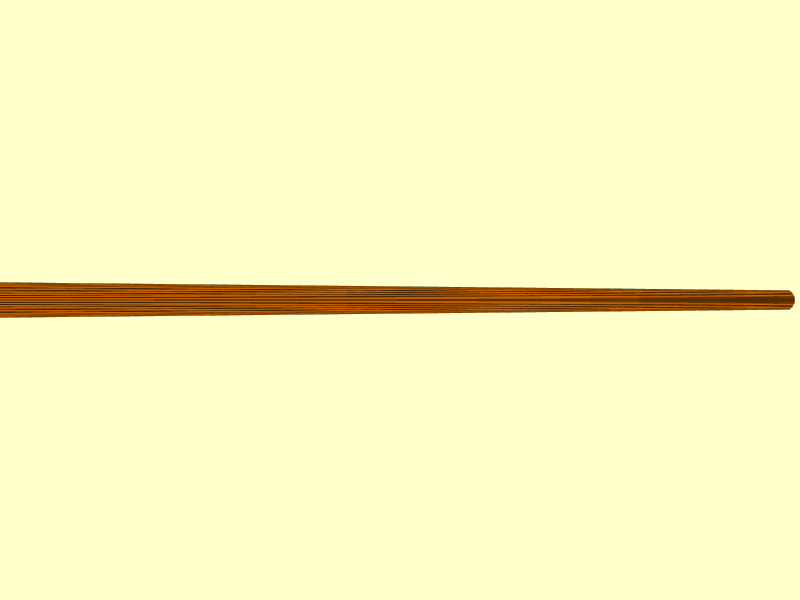

In [1]:
from raypier.tracer import RayTraceModel
from raypier.sources import HexagonalRayFieldSource, ConfocalRayFieldSource
from raypier.lenses import PlanoConvexLens
from raypier.apertures import CircularAperture
from raypier.fields import EFieldPlane
from raypier.constraints import BaseConstraint
from raypier.intensity_image import IntensityImageView
from raypier.intensity_surface import IntensitySurface

from traits.api import Range, on_trait_change
from traitsui.api import View, Item


aperture = CircularAperture(centre=(0,0,10), direction=(0,0,1),
                            hole_diameter = 0.5, edge_width=0.001, invert=True)

src = HexagonalRayFieldSource(resolution=10.0, direction=(0,0,1),
                              radius=2.0,
                              wavelength=1.0)

probe = EFieldPlane(source=src,
                    centre=(0,0,50),
                    direction=(0,1,0),
                    exit_pupil_offset=100.,
                    width=2.0,
                    height=100.0,
                    size=100)

img = IntensityImageView(field_probe=probe)
surf = IntensitySurface(field_probe=probe)


class FocalPlane(BaseConstraint):
    z_pos = Range(50.0,130.0, 57.73)
    
    traits_view = View(Item("z_pos"))
    
    def __init__(self, *args, **kwds):
        super().__init__(*args, **kwds)
        self.on_change_z_pos()
    
    @on_trait_change("z_pos")
    def on_change_z_pos(self):
        probe.centre = (0,0,self.z_pos)
        
        

model = RayTraceModel(sources=[src], optics=[aperture],
                      probes=[probe], constraints=[FocalPlane()],
                      results=[img, surf])
model.ipython_view(800,600)